In [1]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

In [6]:
# Some helper functions
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv", index=1):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

def plot_stat(stat_name, ax, source, index=1):
    stat = get_stat(stat_name, source, index)
    ax.plot(stat)
    ax.grid(True)
    ax.set_title(stat_name)

def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv", index=1):
    i = 1
    fig, ax = plt.subplots(len(stat_names),2)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source, index)
        i+=1
    fig.tight_layout()
    

# Service chain configuration

In [7]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=880, height=520)

In [8]:
# Metadata for specific SFC configurations
exp_ls = "exp11" 
exp_rs = "exp10"
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

# Load stimulus experiments

In [9]:
current_dir = os.getcwd()

exp_ls_csv = "load_stimulus_global.csv"
file_path = os.path.abspath(os.path.join("..\\linear\\datasets", exp_ls_csv))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780 entries, 0 to 177
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1780 non-null   float64
 1   output_rate                         1780 non-null   float64
 2   latency                             1780 non-null   float64
 3   firewall_instructions               1780 non-null   float64
 4   nf_router_instructions              1780 non-null   float64
 5   ndpi_stats_instructions             1780 non-null   float64
 6   payload_scan_instructions           1780 non-null   float64
 7   bridge_instructions                 1780 non-null   float64
 8   firewall_branches                   1780 non-null   float64
 9   nf_router_branches                  1780 non-null   float64
 10  ndpi_stats_branches                 1780 non-null   float64
 11  payload_scan_branches               1780 non

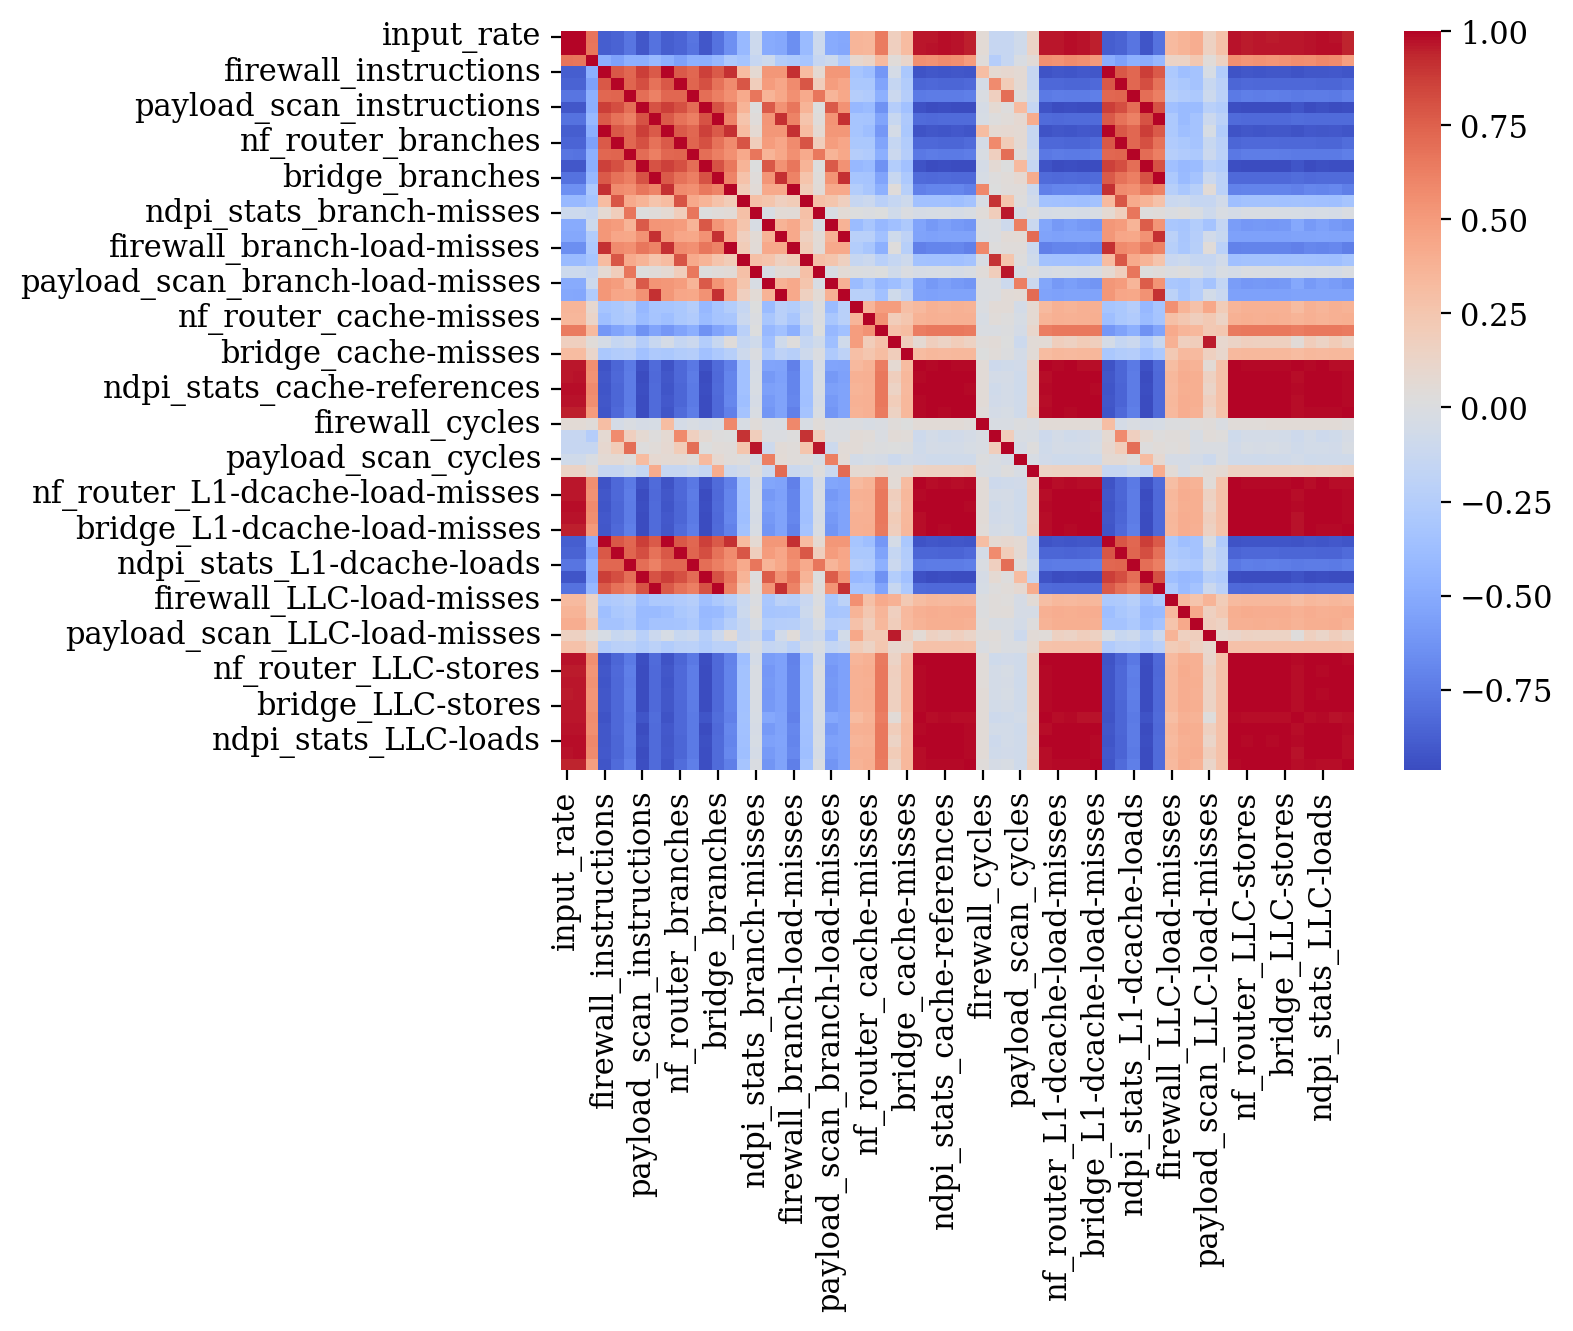

In [10]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")

plt.show()

In [11]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and ndpi_stats_LLC-loads: 0.98
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.98
Correlation between output_rate and ndpi_stats_cache-references: 0.98
Correlation between output_rate and payload_scan_LLC-loads: 0.98
Correlation between output_rate and payload_scan_cache-references: 0.97
Correlation between output_rate and nf_router_LLC-loads: 0.97
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_LLC-stores: 0.97
Correlation between output_rate and nf_router_cache-references: 0.97
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_cache-references: 0.97
Correlation between output_rate and bridge_LLC-stores: 0.97
Correlation between output_rate and ndpi_stats_LLC-stores: 0.97
Correlation between output_rate and firewall_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_L

In [12]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range( len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and latency: 1.00
Correlation between latency and input_rate: 0.67
Correlation between latency and output_rate: 0.67
Correlation between latency and ndpi_stats_LLC-loads: 0.59
Correlation between latency and ndpi_stats_cache-references: 0.58
Correlation between latency and ndpi_stats_L1-dcache-load-misses: 0.57
Correlation between latency and payload_scan_LLC-loads: 0.57
Correlation between latency and firewall_LLC-loads: 0.56
Correlation between latency and firewall_cache-references: 0.56
Correlation between latency and firewall_L1-dcache-load-misses: 0.56
Correlation between latency and payload_scan_cache-references: 0.56
Correlation between latency and nf_router_LLC-loads: 0.56
Correlation between latency and payload_scan_L1-dcache-load-misses: 0.56
Correlation between latency and firewall_LLC-stores: 0.56
Correlation between latency and nf_router_L1-dcache-loads: 0.56
Correlation between latency and nf_router_instructions: 0.55
Correlation between latenc

<Axes: >

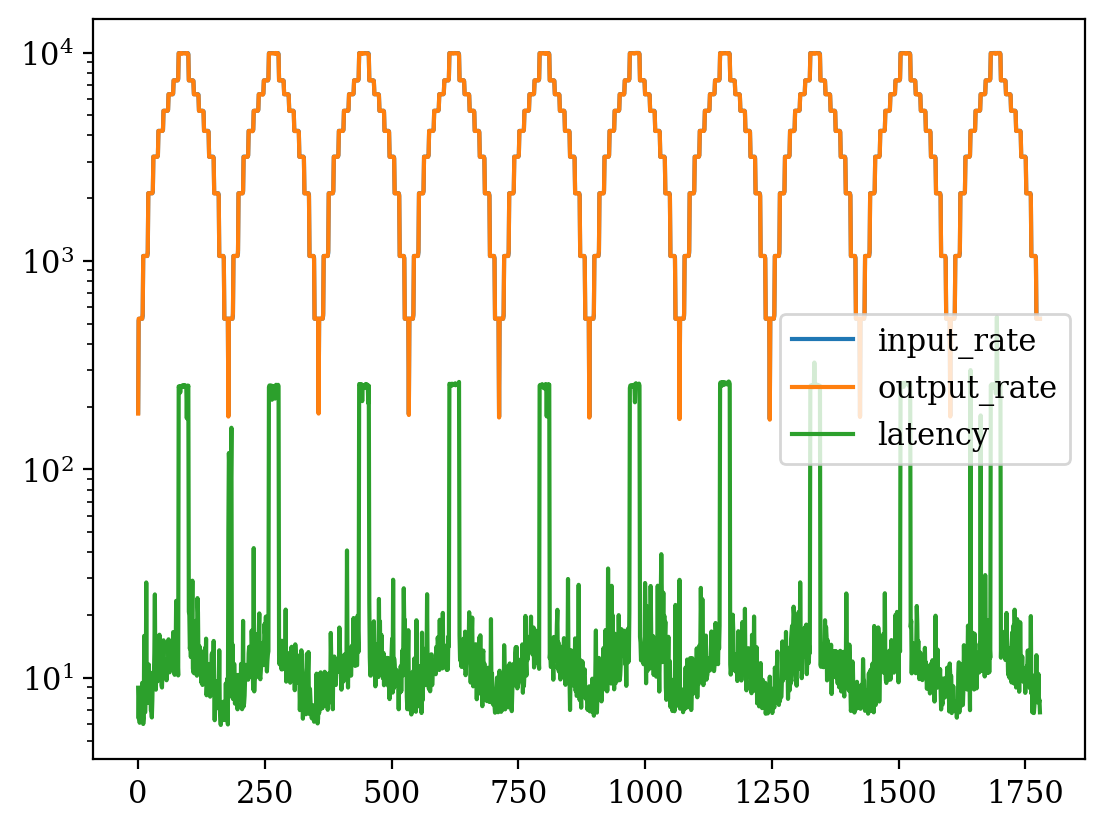

In [13]:
data = data.reset_index(drop=True)
data
data.iloc[:, :3].plot(logy=True)

In [14]:
# linear regression

from sklearn.linear_model import LinearRegression

def linear_regression(a, b):
    # Convert the input lists to numpy arrays
    x = np.array(a)
    y = np.array(b)

    # Reshape the arrays to be 2D
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    # Use the model to make predictions
    y_pred = model.predict(x)

    # Return the predicted values
    return y_pred,r2

In [15]:
# polynomial regression

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


def polynomial_regression(x, y, degree):
    
    # Reshape the arrays to be 2D
    
    x = np.array(x)
    y = np.array(y)

    # Transform the input data into a matrix of polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    # model score
    r2 = r2_score(y, y_pred)
    # Return the coefficients of the polynomial equation
    return model.coef_, y_pred,r2

## Co-relationship between 'input rate' and 'instructions'

0.7842202400098616,0.7368895304371816,0.6018932385540594,0.8427547519319072,0.6226430471486477


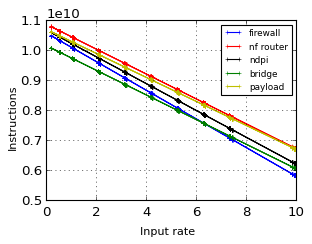

In [28]:
# compare different VNF instruction and rate

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
y_pred_f,r2_f = linear_regression(list(data['input_rate']), data['firewall_instructions'])
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), data['ndpi_stats_instructions'])
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), data['payload_scan_instructions'])
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), data['bridge_instructions'])
y_pred_nf,r2_nf = linear_regression(list(data['input_rate']), data['nf_router_instructions'])


# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf router')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi')

#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=1, marker = '+', markersize=4, label='bridge')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=1, marker = '+', markersize=4, label='payload')
ax.legend(loc="upper right", fontsize=8)

fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0, 0.5, 'Instructions', size='10', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

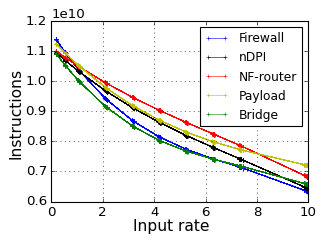

0.8405407512972871,0.7400857419199629,0.6098815976121537,0.896974567704494,0.6769378702356925


In [29]:
# compare different VNF instruction and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_instructions'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_instructions'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_instructions'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_instructions'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_instructions'],3)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="upper right", fontsize=11)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(-0.01, 0.5, 'Instructions', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'instructions_'+ "linear"+ '.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

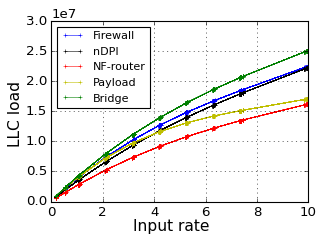

0.9492470236885208,0.9721674537348397,0.973612599747131,0.9739261348061975,0.9602256849233427


In [22]:
# compare different VNF LLC-LOAD and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_LLC-loads'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_LLC-loads'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_LLC-loads'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_LLC-loads'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_LLC-loads'],3)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="upper left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(-0.01, 0.5, 'LLC load', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'LLC_'+ "linear" + '.pdf' )
plt.savefig(file_path, bbox_inches='tight')
plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

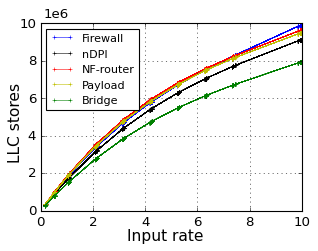

0.9737339316133662,0.9665815062235932,0.9685154946324998,0.9678719051899598,0.9705692577775502


In [30]:
# compare different VNF llc-store and rate
import matplotlib.ticker as mticker

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_LLC-stores'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_LLC-stores'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_LLC-stores'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_LLC-stores'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_LLC-stores'],3)


# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="upper left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(0.01, 0.5, 'LLC stores', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()



ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e6', size='12', ha='left', va='top')

#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'LLC-stores_'+ 'linear'+'.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

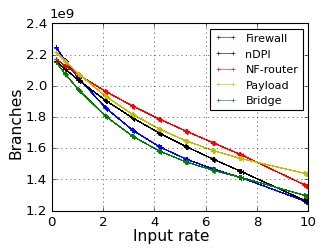

0.8397821468420699,0.7355896098877925,0.6170672433099273,0.8948457038149072,0.6791871532767764


In [31]:
# compare different VNF llc-store and rate
import matplotlib.ticker as mticker

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_branches'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_branches'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_branches'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_branches'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_branches'],3)


# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="upper right", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(-0.01, 0.5, 'Branches', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()



ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{x/1000000000:.1f}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e9', size='12', ha='left', va='top')

#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'linear_branches.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

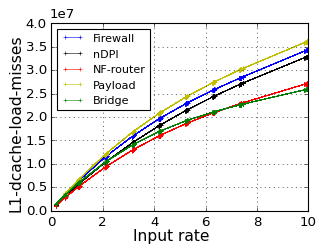

0.9552638203808032,0.9703902790541804,0.9747972081824444,0.9722721573671891,0.9656956627059441


In [32]:
# compare different VNF l1-dcache-load-misses and rate
import matplotlib.ticker as mticker

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_L1-dcache-load-misses'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_L1-dcache-load-misses'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_L1-dcache-load-misses'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_L1-dcache-load-misses'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_L1-dcache-load-misses'],3)


# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="upper left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(-0.01, 0.5, 'L1-dcache-load-misses', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()



ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{x/10000000:.1f}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e7', size='12', ha='left', va='top')

#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'L1-dcache-load-misses_'+ 'linear'+'.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

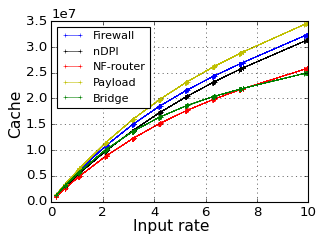

0.9597292036498618,0.9709354378820313,0.9733771376726552,0.9733358739246096,0.9646641533890878


In [33]:
# compare different VNF cache-reference and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_cache-references'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_cache-references'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_cache-references'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_cache-references'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_cache-references'],3)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="upper left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(-0.01, 0.5, 'Cache', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cache-references_'+ 'linear' + '.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

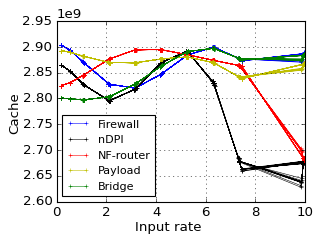

0.02572524904746676,0.07373458816887757,0.04549293396219567,0.015269050630376535,0.026137129437596274


In [34]:
# compare different VNF cycle and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_cycles'],5)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_cycles'],5)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_cycles'],5)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_cycles'],5)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_cycles'],5)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="lower left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='12', ha='center')
fig.text(0, 0.5, 'Cache', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cycles'+ "linear"+'.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

C:\Users\Qiong\AppData\Local\Temp\ipykernel_8752\2269118489.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data['input_rate'] / 1000, data['firewall_cycles'], c=color_map(4), label='Firewall', marker='o', s=30, linewidths=0)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_8752\2269118489.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data['input_rate'] / 1000, data['ndpi_stats_cycles'], c=color_

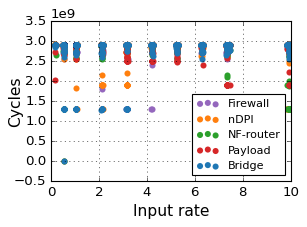

In [35]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
plt.style.use('classic')

# Use 'tab10' color map for distinct colors
color_map = plt.get_cmap('tab10')

# Plot the data points for each VNF
ax.scatter(data['input_rate'] / 1000, data['firewall_cycles'], c=color_map(4), label='Firewall', marker='o', s=30, linewidths=0)
ax.scatter(data['input_rate'] / 1000, data['ndpi_stats_cycles'], c=color_map(1), label='nDPI', marker='o', s=30, linewidths=0)
ax.scatter(data['input_rate'] / 1000, data['nf_router_cycles'], c=color_map(2), label='NF-router', marker='o', s=30, linewidths=0)
ax.scatter(data['input_rate'] / 1000, data['payload_scan_cycles'], c=color_map(3), label='Payload', marker='o', s=30, linewidths=0)
ax.scatter(data['input_rate'] / 1000, data['bridge_cycles'], c=color_map(0), label='Bridge', marker='o', s=30, linewidths=0)

ax.legend(loc="lower right", fontsize=10)

ax.set_xlabel("Input rate", fontsize=14)
ax.set_ylabel("Cycles", labelpad=-8, fontsize=14)
ax.set_facecolor('white')
plt.grid()
ax.set_xlim(0, 10)

# Save the figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cycles1_' + 'linear' + '.pdf')
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


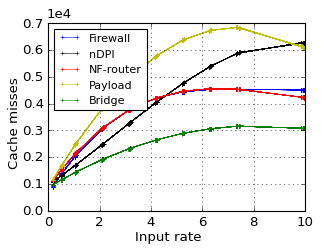

0.17437938070915726,0.19282317307277663,0.4394045217022049,0.04350914754735746,0.12491393388859007


In [36]:
# compare different VNF cache-misses and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['firewall_cache-misses'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['nf_router_cache-misses'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_cache-misses'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_cache-misses'],3)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_cache-misses'],3)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="upper left", fontsize=10)

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{x/10000:.1f}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e4', size='12', ha='left', va='top')


fig.text(0.5, 0.01, "Input rate", size='12', ha='center')
fig.text(0, 0.5, 'Cache misses', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cache-misses_'+ 'linear.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

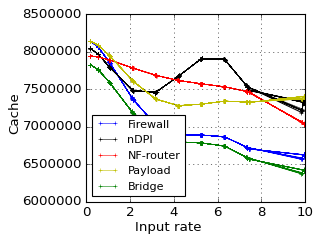

0.5405637066261034,0.17440502027168947,0.0561752013364436,0.4944273770015325,0.317288683589116


In [37]:
# compare different VNF branches-misses and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_branch-misses'],5)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['firewall_branch-misses'],5)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_branch-misses'],5)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_branch-misses'],5)
coef,y_pred_bg,r2_bg = polynomial_regression(list(data['input_rate']), data['bridge_branch-misses'],5)

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Firewall')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


#bridge
l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='g', linewidth=0.5, marker = '+', markersize=3, label='Bridge')

ax.legend(loc="lower left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='12', ha='center')
fig.text(0, 0.5, 'Cache', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'branch-misses_'+ 'linear'+'.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

# Principal component analysis

110360


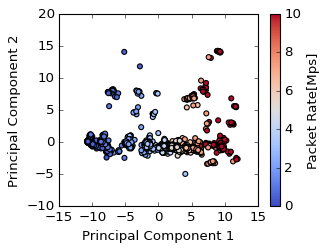

(1780, 2)
Eigenvectors:
 [[ 0.2  0.1 -0.2 -0.1 -0.1 -0.2 -0.1 -0.2 -0.1 -0.1 -0.2 -0.1 -0.1 -0.1
  -0.  -0.1 -0.1 -0.1 -0.1 -0.  -0.1 -0.1  0.1  0.1  0.1  0.   0.1  0.2
   0.2  0.2  0.2  0.2 -0.  -0.  -0.  -0.   0.   0.2  0.2  0.2  0.2  0.2
  -0.2 -0.1 -0.1 -0.2 -0.1  0.1  0.1  0.1  0.   0.   0.2  0.2  0.2  0.2
   0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.   0.1  0.  -0.1 -0.2  0.1  0.1  0.  -0.1 -0.2  0.1  0.1  0.  -0.3
  -0.4  0.1  0.1  0.  -0.3 -0.4  0.1  0.1 -0.1 -0.1 -0.1 -0.  -0.1 -0.
  -0.  -0.  -0.  -0.   0.  -0.3 -0.4  0.1  0.  -0.  -0.  -0.  -0.  -0.
   0.  -0.1 -0.2  0.1  0.1 -0.1 -0.1 -0.  -0.  -0.  -0.  -0.  -0.  -0.
  -0.  -0.  -0.  -0.  -0.  -0. ]]
Eigenvalues:
 [37.   4.9]


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\linear\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
independent_variables = df.drop(target_col, axis=1)
dependent_variable = df[target_col].div(1000)

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))

# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')
fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')
# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=10)
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
abs_path = os.path.join("..\\linear\\figure\\phase_changed_rate", "pca_"+ exp_ls +'.pdf')
plt.savefig(abs_path)
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
print(np.shape(independent_variables_pca))
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))



dependent_variable:9954.0057916325
110360
(1780, 5)
PCA explained variance ratio: [0.59676223 0.07858636]


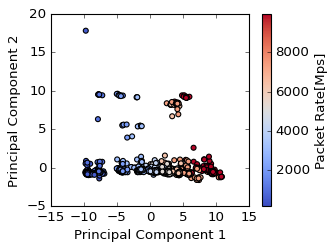

(1780, 5)
Eigenvectors:
 [[ 0.2  0.1 -0.2 -0.1 -0.1 -0.2 -0.1 -0.2 -0.1 -0.1 -0.2 -0.1 -0.1 -0.1
  -0.  -0.1 -0.1 -0.1 -0.1 -0.  -0.1 -0.1  0.1  0.1  0.1  0.   0.1  0.2
   0.2  0.2  0.2  0.2 -0.  -0.  -0.  -0.   0.   0.2  0.2  0.2  0.2  0.2
  -0.2 -0.1 -0.1 -0.2 -0.1  0.1  0.1  0.1  0.   0.   0.2  0.2  0.2  0.2
   0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.   0.1  0.  -0.1 -0.2  0.1  0.1  0.  -0.1 -0.2  0.1  0.1  0.  -0.3
  -0.4  0.1  0.1  0.  -0.3 -0.4  0.1  0.1 -0.1 -0.1 -0.1 -0.  -0.1 -0.
  -0.  -0.  -0.  -0.   0.  -0.3 -0.4  0.1  0.  -0.  -0.  -0.  -0.  -0.
   0.  -0.1 -0.2  0.1  0.1 -0.1 -0.1 -0.  -0.  -0.  -0.  -0.  -0.  -0.
  -0.  -0.  -0.  -0.  -0.  -0. ]]
Eigenvalues:
 [37.   4.9]


In [39]:
#spca

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')
# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\linear\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
dependent_variable = df[target_col]
independent_variables = df.drop(target_col, axis=1)
print(f'dependent_variable:{max(dependent_variable)}')



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
spca = SparsePCA(n_components=5, alpha =1)

# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)
independent_variables_pca = spca.transform(independent_variables_scaled)
unique_values = dependent_variable.unique()

# Define colormap 
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
abs_path = os.path.join("..\\linear\\figure\\phase_changed_rate", "spca_"+ exp_ls +'.pdf')
plt.savefig(abs_path)


plt.show()

# Print the eigenvectors and eigenvalues with one decimal place
print(np.shape(independent_variables_pca))
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))


dependent_variable:538.97
5.94
538.97
110360
(1780, 2)


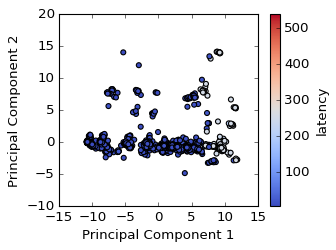

(1780, 3)
PCA explained variance ratio: [0.60702029 0.07808089]


Text(0, 0.5, 'Principal Component 2')

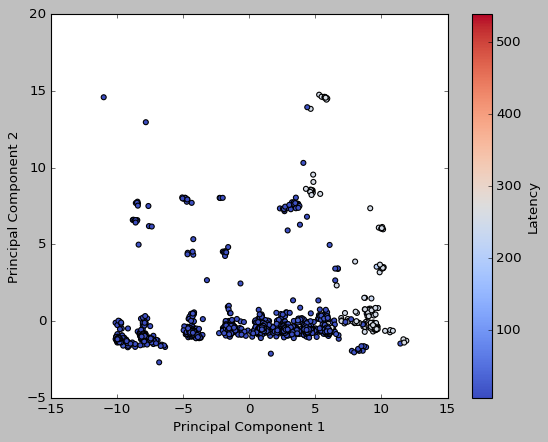

In [44]:
# latency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\linear\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'latency'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]


print(f'dependent_variable:{max(dependent_variable)}')

print(min(df[target_col]))
print(max(df[target_col]))

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components = 2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))

# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label(target_col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.show()

# spca

# Perform SPCA
spca = SparsePCA(n_components=3, alpha =1)
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)
independent_variables_pca = spca.transform(independent_variables_scaled)
unique_values = dependent_variable.unique()

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Latency')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')



# Decision tree to predict rate

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Load CSV data

current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\linear\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']

# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)

# Train the regressor on the training set
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the percentage of predictions within 5% threshold
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100

# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)

Accuracy within 5% threshold: 85.58052434456928


# Predict rate with partial data

In [46]:
# Separate the features and target variable

# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\linear\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)


X1 = df[['nf_router_instructions']]#,'ndpi_stats_instructions','payload_scan_instructions',"firewall_instructions", "bridge_instructions"]]
y = df['input_rate']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=0)

# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg1 = DecisionTreeRegressor(random_state=0)

# Train the regressor on the training set
reg1.fit(X1_train, y1_train)
y1_pred = reg1.predict(X1_test)

# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances_parital = [abs(real - pred) / real for real, pred in zip(y1_test, y1_pred)]
accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances_parital) / len(distances_parital) * 100

# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold_partial)

Accuracy within 5% threshold: 69.47565543071161


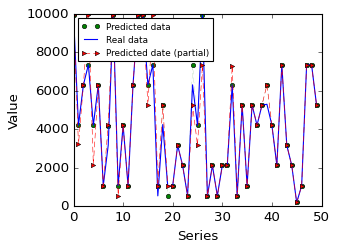

In [47]:
# plot
fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')
plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.1, dashes=(5, 3),label='Predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='Real data')
plt.plot(y1_pred[0:50], marker='>',markersize = 4,c='r',linestyle='-', linewidth=0.5, dashes=(5, 3),label='Predicted date (partial)')


plt.legend(loc="upper left", fontsize=8)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()

#save figure
abs_path = os.path.join("..\\linear\\figure\\phase_changed_rate", "ratepredictoin_DT_"+ exp_ls +'.pdf')
plt.savefig(abs_path)
plt.grid()
plt.show()

# Predict latency

In [48]:
# Load CSV data

current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_" + exp_ls + ".csv"
file_path = os.path.abspath(os.path.join("..\\linear\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the features and target variable
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
y = df['latency']

# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)

# Train the regressor on the training set
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)

Accuracy within 5% threshold: 21.722846441947567


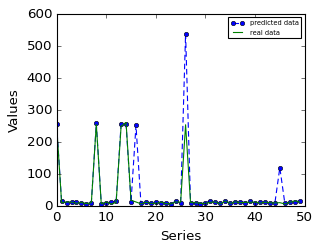

In [49]:
fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:50], marker='o',markersize = 4, linestyle='-', dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',linewidth = 1,label='real data')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=6)
plt.grid()
plt.grid()